In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from datetime import datetime, timedelta
import seaborn as sns

import datetime
from dateutil.parser import parse

import numpy as np


from matplotlib import rcParams

plt.rcParams["figure.figsize"] = (20,10)
# %reset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import glob

all_files = glob.glob("./Duo_Auth*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Francisco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df['Timestamp (UTC)'] = pd.to_datetime(df['Timestamp (UTC)'])
df['date'] = df['Timestamp (UTC)'].apply(lambda timestamp: timestamp.date())
df['month'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.month)
df['hour'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.hour)
df['minute'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.minute)
df['second'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.second)

In [5]:
logs = df
print(logs.shape)
logs.head(2)

(7077783, 16)


,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10


In [6]:
users = pd.read_csv('duo_users_clean.csv')
users['Created'] = users['Created'].apply(lambda date: parse(date))
users.head()

,Alias,Status,Created,Last Login,Phone 1 platform,Phone 2 platform,Phone 3 platform,Phone 4 platform,Phone 5 platform,Phone 6 platform,Phone 7 platform,Student,Description,Index
0,user_000001,Active,2017-04-26 18:31:00,4/7/2021 15:00,Landline,NaN,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),1
1,user_000002,Active,2017-04-26 18:58:00,4/6/2021 21:34,Android,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),2
2,user_000003,Active,2017-04-27 20:42:00,4/6/2021 16:35,Landline,Android,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),3
3,user_000004,Active,2017-08-16 17:10:00,4/7/2021 14:23,iOS,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),4
4,user_000005,Active,2017-09-12 22:03:00,4/7/2021 0:17,Android,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),5


In [7]:
mask1 = users["Description"] == "Active (Student)"
mask2 = users["Description"] == "Active (Faculty)"
mask3 = users["Description"] == "Active (Staff)"

In [8]:
subsetOfUsers = users[(mask1) | (mask2) | (mask3)]
subsetOfUsers.Description.value_counts()

Active (Student)    34996
Active (Faculty)     1899
Active (Staff)       1204
Name: Description, dtype: int64

In [9]:
typeOfUsers = subsetOfUsers.set_index("Alias")["Description"].to_dict()

In [10]:
logs = logs[logs['Alias'].isin(typeOfUsers)]

In [11]:
logs['Description'] = logs.Alias.apply(lambda alias: typeOfUsers[alias])

<ipython-input-11-489641ab1da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['Description'] = logs.Alias.apply(lambda alias: typeOfUsers[alias])


In [12]:
# Get a list of active students, faculty, and staff that have logged in
activeUsers = logs.Alias.unique()

In [13]:
subsetOfUsers = subsetOfUsers[subsetOfUsers['Alias'].isin(activeUsers)]
len(subsetOfUsers)

35883

In [14]:
subsetOfUsers.Description.value_counts()

Active (Student)    32931
Active (Faculty)     1773
Active (Staff)       1179
Name: Description, dtype: int64

In [15]:
# have to run up to list line when starting

In [17]:
# Users Created after november
usersCreatedAfterNovember = subsetOfUsers[subsetOfUsers['Created']>'2020-11-01']
usersCreatedAfterNovember.shape

(1029, 14)

In [18]:
typeOfUsersAfterNovember = usersCreatedAfterNovember.set_index("Alias")["Description"].to_dict()

In [19]:
enrollmentAnlysisLogs = logs[logs['Alias'].isin(typeOfUsersAfterNovember)]

In [20]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Remembered device']

In [21]:
enrollmentAnlysisLogs.set_index('Alias', inplace=True)

In [22]:
def addToDataFrame(data):
    df_length = len(userEnrollmentLogs)
    userEnrollmentLogs.loc[df_length] = data

In [23]:
userEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])
# success and failure data

# users who have authenticated at least 10 times
usersWithTenAuth = []

for user in usersCreatedAfterNovember.Alias:
    array = []
    counter = 0
    errorRate = 0
    failures = 0
    if(len(enrollmentAnlysisLogs.loc[user]['Result'])<10):
        continue
    usersWithTenAuth.append(user)
    for i in enrollmentAnlysisLogs.loc[user]['Result']:
        counter += 1
        array.append(i)
        if(counter==10):
            break
#     print(enrollmentAnlysisLogs.loc[user].Description)
    addToDataFrame(array)

In [24]:
userEnrollmentLogs.shape

(766, 10)

In [25]:
userEnrollmentLogs.head()

,1,2,3,4,5,6,7,8,9,10
0,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS
1,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,FAILURE,SUCCESS,SUCCESS,SUCCESS,SUCCESS
2,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS
3,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,FAILURE,FAILURE
4,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS


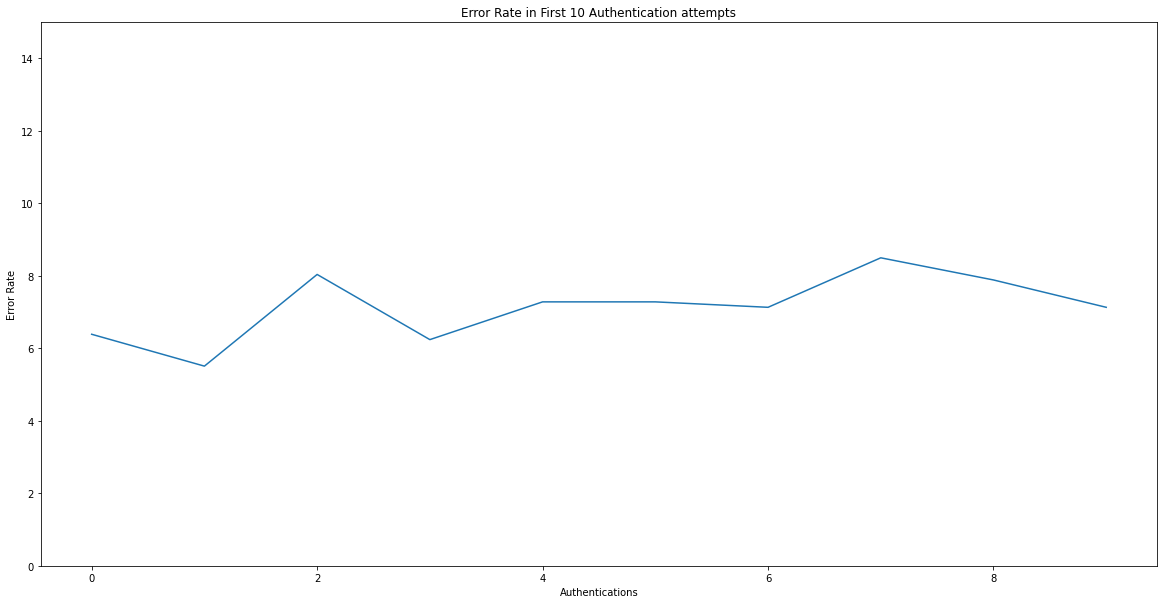

In [26]:
successVsfailureEnrollmentLogs = []
for i in range(1,11):
    value = (userEnrollmentLogs[[str(i)]].value_counts()[1] / userEnrollmentLogs[[str(i)]].value_counts()[0])*100
    successVsfailureEnrollmentLogs.append(value)
plt.ylim(0,15)
plt.title('Error Rate in First 10 Authentication attempts')
plt.ylabel('Error Rate')
plt.xlabel('Authentications')
# plt.xticks([2,3,4,5,6,7,8,9,10])
plt.plot(successVsfailureEnrollmentLogs)

plt.show()
plt.rcParams["figure.figsize"] = (20,10)
# print(successVsfailureEnrollmentLogs)

In [ ]:
# Success Rate by month

In [27]:
users_logs_by_month = logs[logs['month']!=5][["month","Result","Reason"]].groupby(["month","Result"]).count()

In [28]:
users_logs_by_month.head()

Reason
month Result         
1     FAILURE   52240
      FRAUD        17
      SUCCESS  877108
2     FAILURE   47489
      FRAUD        18

In [29]:
ax = users_logs_by_month.unstack(level=1)
ax.columns = ax.columns.droplevel()
ax.drop(columns=['FRAUD'], inplace=True)

In [30]:
ax['success_percent'] = round((ax['SUCCESS'] / (ax['SUCCESS'] + ax['FAILURE'])),2)
ax['failure_percent'] = round((ax['FAILURE'] / (ax['SUCCESS'] + ax['FAILURE'])),2)

In [31]:
ax

Result,FAILURE,SUCCESS,success_percent,failure_percent
month,,,,
1,52240,877108,0.94,0.06
2,47489,1064246,0.96,0.04
3,41964,936941,0.96,0.04
4,46608,1075649,0.96,0.04
11,57298,1058468,0.95,0.05
12,42738,805198,0.95,0.05


In [32]:
new_index = [11,12,1,2,3,4]
ax = ax.reindex(new_index)

In [33]:
ax = ax.rename(index={11: 'November', 12: 'December', 1: 'January', 2: 'February', 3: 'March', 4: 'April'})

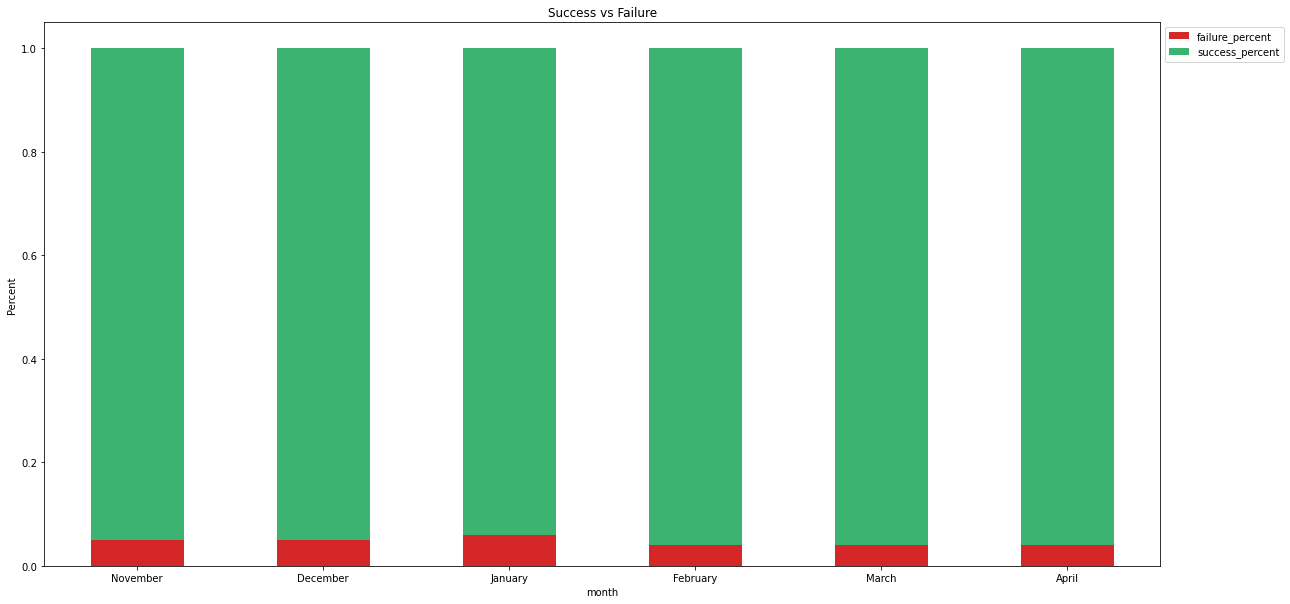

In [34]:
# ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0)
ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0, color=['tab:red','mediumseagreen'])
# ax[['FAILURE','SUCCESS']].plot(rot=0, color=['tab:red','mediumseagreen'])
plt.title('Success vs Failure')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [220]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

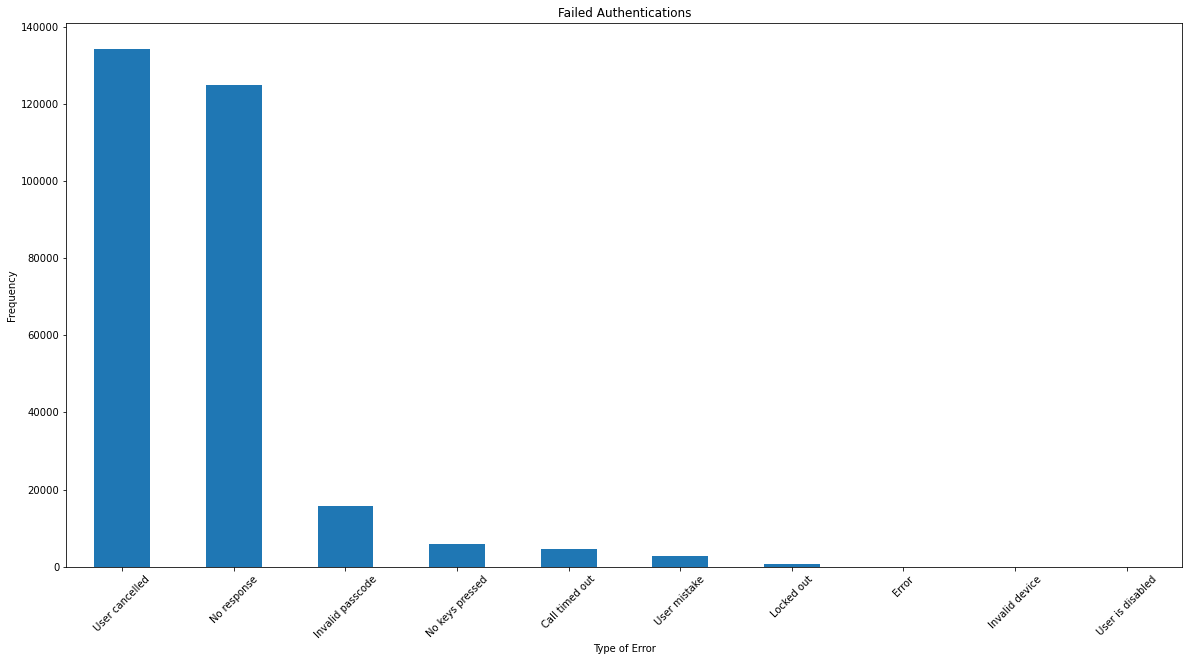

In [221]:
authenticationFailures.Reason.value_counts().plot.bar()
plt.rcParams["figure.figsize"] = (4,4)
plt.xticks(rotation= 45) 
plt.ylabel('Frequency')
plt.xlabel('Type of Error')
plt.title('Failed Authentications')
plt.show()

In [55]:
userErrorRate = logs[['Alias','Result','Reason']].groupby(['Alias','Result']).count()

In [65]:
userQuantifiedLogs = userErrorRate.reset_index().pivot(index='Alias',columns='Result',values='Reason').drop(columns=['FRAUD'])

In [73]:
print(userQuantifiedLogs.columns)

Index(['FAILURE', 'SUCCESS'], dtype='object', name='Result')


In [74]:
userQuantifiedLogs.head()

Result,FAILURE,SUCCESS
Alias,,
user_000001,7.0,177.0
user_000002,2.0,494.0
user_000003,31.0,372.0
user_000004,7.0,306.0
user_000005,6.0,448.0


In [75]:
userQuantifiedLogs['errorRate'] = userQuantifiedLogs['FAILURE'] / userQuantifiedLogs['SUCCESS']

In [81]:
userQuantifiedLogs.sort_values(by='errorRate', inplace=True)

In [91]:
userQuantifiedLogs.insert(0,'New_ID', range(1, len(userQuantifiedLogs)+1))

In [94]:
userQuantifiedLogs.head()

Result,New_ID,FAILURE,SUCCESS,errorRate,userPercentage
Alias,,,,,
user_000131,1,1.0,1071.0,0.000934,0.000028
user_016940,2,1.0,978.0,0.001022,0.000056
user_008563,3,1.0,976.0,0.001025,0.000084
user_000788,4,1.0,946.0,0.001057,0.000111
user_003565,5,1.0,928.0,0.001078,0.000139


In [93]:
userQuantifiedLogs['userPercentage'] = userQuantifiedLogs['New_ID'].apply(lambda num: num/len(userQuantifiedLogs))

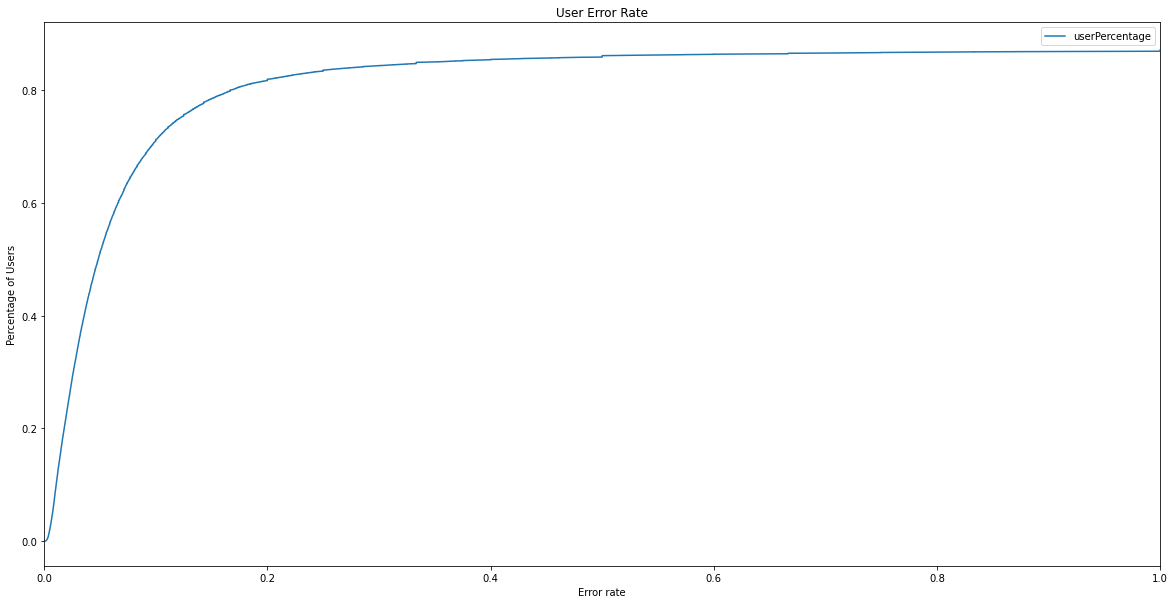

In [103]:
userQuantifiedLogs.plot(x='errorRate', y='userPercentage', legend=False)
plt.ylabel('Percentage of Users')
plt.xlabel('Error rate')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim(0,1)
plt.title('User Error Rate')
plt.show()

In [105]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

In [118]:
factorLogs = logs

In [127]:
factorLogs = factorLogs[['Factor','Result','Reason']].groupby(by=['Factor','Result']).count().reset_index(level=1).pivot(columns="Result")

In [135]:
factorLogs.columns = factorLogs.columns.droplevel()

In [140]:
factorLogs.drop(columns='FRAUD', inplace=True)

In [144]:
factorLogs.fillna(0, inplace=True)

In [149]:
factorLogs['failurePercent'] = (factorLogs['FAILURE'] / (factorLogs['FAILURE'] + factorLogs['SUCCESS']))*100

In [152]:
factorLogs.drop('Bypass Status', inplace=True)

In [157]:
passCodeFailure = factorLogs.loc['Bypass Code']['FAILURE'] + factorLogs.loc['Duo Mobile Passcode']['FAILURE'] + factorLogs.loc['Hardware Token']['FAILURE'] + factorLogs.loc['Passcode']['FAILURE'] + factorLogs.loc['Yubikey Passcode']['FAILURE']

In [158]:
passCodeSucess = factorLogs.loc['Bypass Code']['SUCCESS'] + factorLogs.loc['Duo Mobile Passcode']['SUCCESS'] + factorLogs.loc['Hardware Token']['SUCCESS'] + factorLogs.loc['Passcode']['SUCCESS'] + factorLogs.loc['Yubikey Passcode']['SUCCESS']

In [161]:
factorLogs.loc['passcode'] = [passCodeFailure, passCodeSucess, (passCodeFailure/passCodeSucess)*100]

In [163]:
factorLogs.drop(['Bypass Code','Duo Mobile Passcode','Hardware Token','Passcode'], inplace=True)

In [167]:
factorLogs.drop(['Yubikey Passcode'], inplace=True)

In [173]:
factorLogs[['failurePercent']].sort_values(by='failurePercent', ascending=False)

Result,failurePercent
Factor,
passcode,5.182556
Phone Call,3.864738
Duo Push,2.926649
Remembered Device,0.000000
Security Key (WebAuthn),0.000000
Touch ID (WebAuthn),0.000000
U2F Token,0.000000


In [174]:
factorsBeingUsed = logs.reset_index()[['Factor','Description','Reason','Alias']]
factorsBeingUsed.head()

,Factor,Description,Reason,Alias
0,Phone Call,Active (Student),User approved,user_008576
1,Duo Push,Active (Student),User approved,user_049277
2,Duo Push,Active (Student),User approved,user_025756
3,Duo Push,Active (Student),User approved,user_030286
4,Duo Push,Active (Student),User approved,user_019093


In [187]:
factorUsage = factorsBeingUsed.groupby(['Description','Factor','Alias']).count().unstack(level=2).count(axis=1).reset_index()

In [188]:
def computePercentageOfGroup(row):
    if(row['Description']=='Active (Faculty)'):
        return round((row[0] / 1773) * 100, 1)
    elif(row['Description']=='Active (Staff)'):
        return round((row[0] / 1179) * 100, 1)
    elif(row['Description']=='Active (Student)'):
        return round((row[0] / 32931) * 100, 1)

In [189]:
factorUsage['percentOfPopulation'] = factorUsage.apply(lambda row: computePercentageOfGroup(row), axis=1)

In [211]:
factorUsageResult = factorUsage.set_index(['Description','Factor'])['percentOfPopulation'].unstack(level=1).transpose().fillna(0).sort_values(by='Active (Student)', ascending=False)
factorUsageResult.drop('Passcode', inplace=True)


Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1
Security Key (WebAuthn),2.0,0.9,0.0


In [212]:
factorUsageResult

Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1
Security Key (WebAuthn),2.0,0.9,0.0


Recovery

In [191]:
y = pd.read_csv('updatedRT.csv')

In [192]:
y['Description'] = y.user.apply(lambda alias: typeOfUsers[alias])

In [193]:
y['recovery_time'] = y['recovery_time'].astype(int)

In [194]:
y['recovery_time_in_minutes'] = y['recovery_time'].apply(lambda seconds: seconds // 60)

In [195]:
def convert(seconds):
    min, sec = divmod(seconds, 60)
    print(min, sec)
    if min != 0:
        return min
    else:
        return sec      

In [196]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
0,user_000001,19,Active (Staff),0
1,user_000002,30067,Active (Staff),501
2,user_000003,345,Active (Staff),5
3,user_000004,5,Active (Staff),0
4,user_000005,164,Active (Staff),2


In [197]:
y.sort_values(by='recovery_time', inplace=True)

In [198]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
31124,user_046676,0,Active (Student),0
4974,user_007729,0,Active (Student),0
29216,user_044532,0,Active (Student),0
29210,user_044525,0,Active (Student),0
29206,user_044521,0,Active (Student),0


In [199]:
y.insert(0,'New_ID', range(1, len(y)+1))

In [200]:
y['userPercentage'] = y['New_ID'].apply(lambda num: num/len(y))

In [201]:
y.head()

,New_ID,user,recovery_time,Description,recovery_time_in_minutes,userPercentage
31124,1,user_046676,0,Active (Student),0,0.000028
4974,2,user_007729,0,Active (Student),0,0.000056
29216,3,user_044532,0,Active (Student),0,0.000084
29210,4,user_044525,0,Active (Student),0,0.000111
29206,5,user_044521,0,Active (Student),0,0.000139


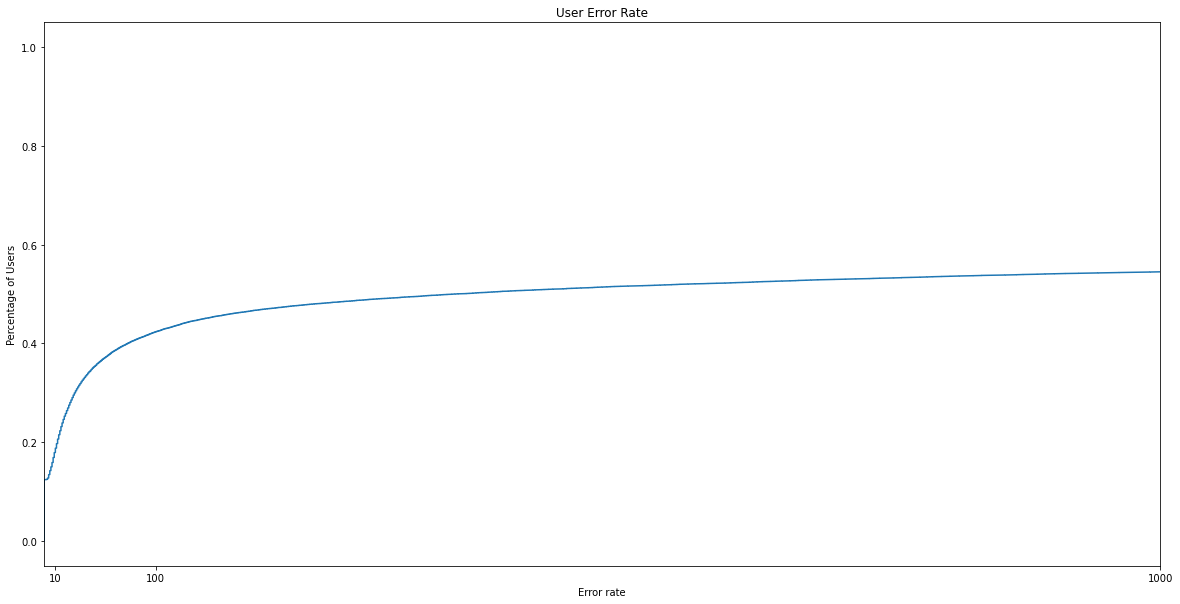

In [245]:
plt.rcParams["figure.figsize"] = (20,10)
y.plot(x='recovery_time', y='userPercentage', legend=False)
plt.ylabel('Percentage of Users')
plt.xlabel('Error rate')
# plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim(0,1000)
x_ticks = [10,100,1000]
plt.xticks(x_ticks)
plt.title('User Error Rate')
plt.show()

In [246]:
logs.head()

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second,Description
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7,Active (Student)
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10,Active (Student)
3,2021-04-01 07:00:25.203564+00:00,user_025756,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Lodi,NaN,2021-04-01,4,7,0,25,Active (Student)
4,2021-04-01 07:00:27.389194+00:00,user_030286,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Antioch,NaN,2021-04-01,4,7,0,27,Active (Student)
5,2021-04-01 07:00:30.814923+00:00,user_019093,Single Sign-On,Duo Push,SUCCESS,User approved,False,PH,Metro Manila,Pasig,NaN,2021-04-01,4,7,0,30,Active (Student)


In [251]:
logs[['Factor','Result','month']].groupby(['month','Factor']).count()

Result
month Factor                         
1     Bypass Code                 140
      Bypass Status               462
      Duo Mobile Passcode       34174
      Duo Push                 573462
      Hardware Token            12354
      Passcode                   2029
      Phone Call               114449
      Remembered Device        163239
      Security Key (WebAuthn)     557
      Touch ID (WebAuthn)        3065
      U2F Token                  2180
      Yubikey Passcode              1
2     Bypass Code                 268
      Bypass Status               454
      Duo Mobile Passcode       38983
      Duo Push                 685134
      Hardware Token            14302
      Passcode                   1957
      Phone Call               131844
      Remembered Device        208977
      Security Key (WebAuthn)     651
      Touch ID (WebAuthn)        3627
      U2F Token                  2654
      Yubikey Passcode              1
3     Bypass Code                 220
      Bypass Status               447
      Duo Mobile Passcode       32669
      Duo Push                 605309
      Hardware Token            13976
      Passcode                   1757
      Phone Call               118483
      Remembered Device        179256
      Security Key (WebAuthn)     565
      Touch ID (WebAuthn)        3285
      U2F Token                  2602
      Yubikey Passcode              7
4     Bypass Code                 329
      Bypass Status               474
      Duo Mobile Passcode       35228
      Duo Push                 687033
      Hardware Token            14034
      Passcode                   1924
      Phone Call               133840
      Remembered Device        220139
      Security Key (WebAuthn)     563
      Touch ID (WebAuthn)        3700
      U2F Token                  2822
5     Bypass Code                   2
      Bypass Status                 1
      Duo Mobile Passcode         343
      Duo Push                   7070
      Hardware Token               64
      Passcode                     23
      Phone Call                 1401
      Remembered Device          2404
      Security Key (WebAuthn)       3
      Touch ID (WebAuthn)          48
      U2F Token                    10
11    Bypass Code                 240
      Bypass Status               342
      Duo Mobile Passcode       49332
      Duo Push                 690756
      Hardware Token            12855
      Passcode                   2642
      Phone Call               122046
      Remembered Device        204621
      Security Key (WebAuthn)     536
      Touch ID (WebAuthn)        3403
      U2F Token                  2177
12    Bypass Code                 172
      Bypass Status               308
      Duo Mobile Passcode       35132
      Duo Push                 527273
      Hardware Token            11504
      Passcode                   1957
      Phone Call                98426
      Remembered Device        148852
      Security Key (WebAuthn)     444
      Touch ID (WebAuthn)        2684
      U2F Token                  2183